# Case study: Expanding our candy brand

**Scenario**:

The Lidl purchasing group wants to expand our candy offering. These are store brand candies that we sell along the brand offerings. The idea is to create a brand-new product. The team is discussing various options now.
Some prefer cookie-based sweets while others think that it should be gummies. The Divisional Director responsible for purchasing has decided to use a more data-driven approach. He contracted with a market research group to collect data on products in the market and their characteristics and customer sentiment.

The market research data is now available, and it is your job to find out which product characteristics drive customer sentiment and subsequently make a recommendation on a new product.

**Data**:

The data set is located (incl. a short description) here:
https://github.com/fivethirtyeight/data/tree/master/candy-power-ranking
The data set is provided by FiveThirtyEight under the Creative Commons Attribution 4.0 International license (https://creativecommons.org/licenses/by/4.0/)

**Deliverables**:
 
Presentation and source code.



In [35]:
#libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#load candy dataset
df = pd.read_csv('candy_data.txt')

In [34]:
#check the basic data stats (dimensions, NaNs, characteristics)
print(60*'*',
    '\n',
    'Dataset dimensions: ', df.shape,
    '\n', 60*'-', '\n',
    'Columns and number of missing values: ', 
    '\n',
    df.isna().sum(),
    '\n', 60*'*')
    
df.describe()

************************************************************ 
 Dataset dimensions:  (85, 13) 
 ------------------------------------------------------------ 
 Columns and number of missing values:  
 competitorname      0
chocolate           0
fruity              0
caramel             0
peanutyalmondy      0
nougat              0
crispedricewafer    0
hard                0
bar                 0
pluribus            0
sugarpercent        0
pricepercent        0
winpercent          0
dtype: int64 
 ************************************************************


,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,0.435294,0.447059,0.164706,0.164706,0.082353,0.082353,0.176471,0.247059,0.517647,0.478647,0.468882,50.316764
std,0.498738,0.500140,0.373116,0.373116,0.276533,0.276533,0.383482,0.433861,0.502654,0.282778,0.285740,14.714357
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011000,0.011000,22.445341
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.220000,0.255000,39.141056
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.465000,0.465000,47.829754
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.732000,0.651000,59.863998
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.988000,0.976000,84.180290


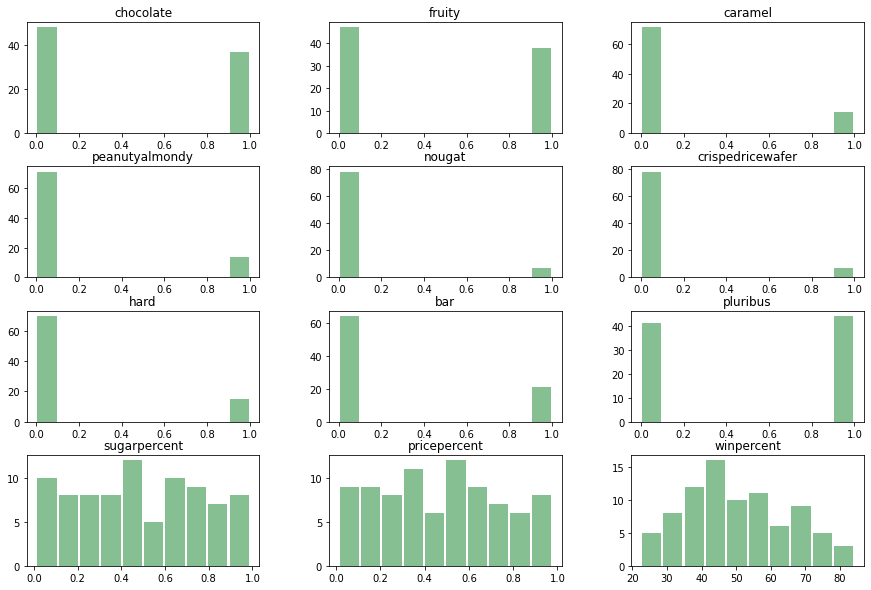

In [33]:
# the histograms
p = df.hist(figsize=(15,10), grid=False, color='#86bf91',rwidth=0.9)


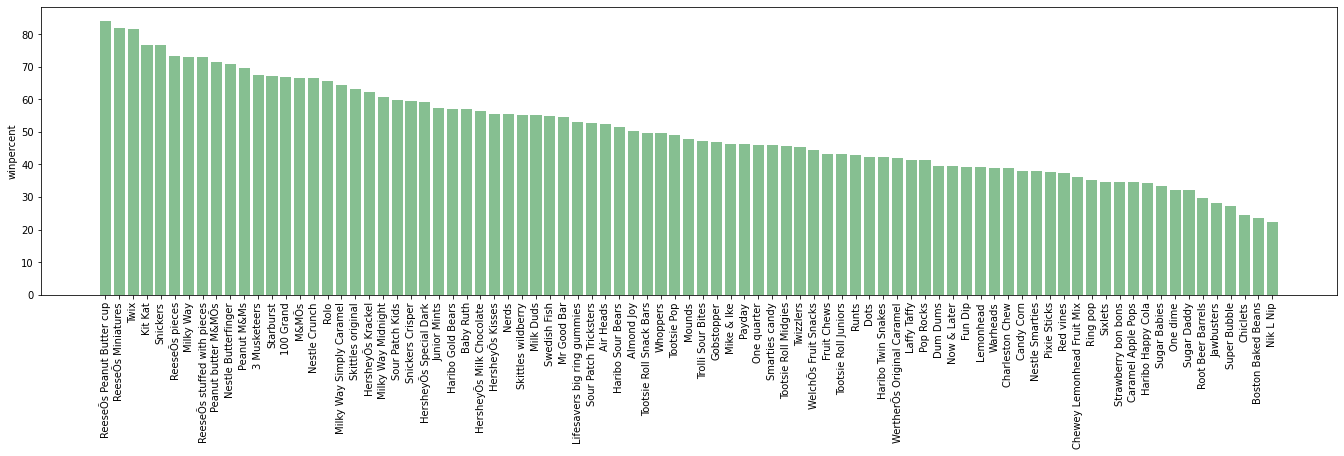

In [61]:
#show the winners
fig = plt.figure(figsize=(18,4))
ax = fig.add_axes([0,0,1,1])
company = df.sort_values(by='winpercent', ascending = False)['competitorname']
rating = df.sort_values(by='winpercent', ascending = False)['winpercent']
ax.bar(company,rating, color = '#86bf91')
plt.xticks(rotation=90)
plt.ylabel('winpercent')

plt.show()

Text(0, 0.5, 'sugarpercent')

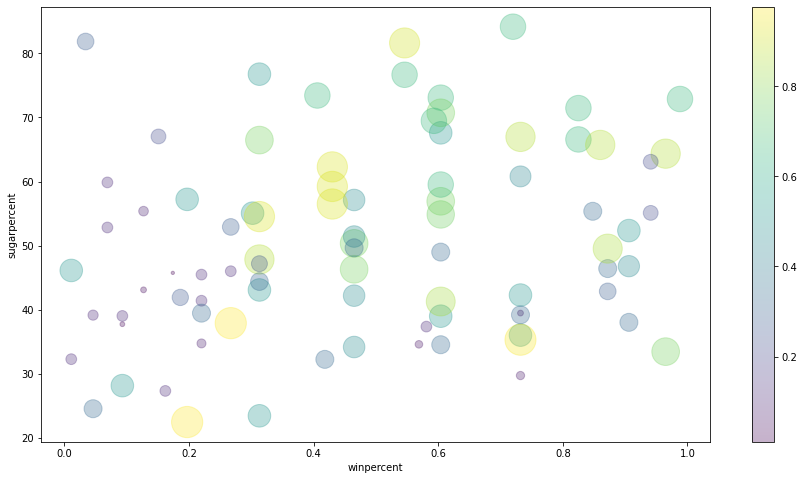

In [71]:
fig = plt.figure(figsize=(15,8))
x = df['sugarpercent']
y = df['winpercent']
colors = df['pricepercent']
sizes = 1000 * df['pricepercent']
plt.scatter(x, y, c=colors, s=sizes, alpha=0.3, cmap='viridis')
plt.colorbar();  # show color scale
plt.xlabel('winpercent')
plt.ylabel('sugarpercent')